# Tracks from the PV

This was made in trying to understand the tracks that come from our derivation are like.

In [1]:
from calratio_training_data import fetch_training_data, build_preselection, run_query
import hist
from hist import Hist
import mplhep
import matplotlib.pyplot as plt
import awkward as ak

## Input

We are using a local file provided by Ana ([see this indico agenda](https://indico.cern.ch/event/1508676/#1-introduction-and-status-repo)):

In [2]:
# Assume we are in the local directory of the notebook
ds_name = "../DAOD_LLP1.outputLLP1_mc23_537565_trigger.pool.root"

full_data = fetch_training_data(ds_name)

Lets get the numbers of tracks that are not valid as well as some basic info about the inner detector tracks.

In [3]:
preselection = build_preselection()

extra_info_query = preselection.Select(lambda e: {
    'bad_pv_tracks': len([t for t in e.vertices.First().trackParticleLinks() if not t.isValid()]),
    'good_pv_tracks': len(e.pv_tracks),
    })

extra_info = run_query(ds_name, extra_info_query)

## Plots

Don't know what is really going on, but we can take a quick look at the data. First, the number of tracks that are good and bad.

In [4]:
track_axis = hist.axis.Regular(100, 0, 99, name="n Tracks")
h_good_tracks = Hist(track_axis, label="Good Tracks").fill(extra_info.good_pv_tracks)
h_bad_tracks = Hist(track_axis, label="Bad Tracks").fill(extra_info.bad_pv_tracks)

Look at the number of good and bad tracks per PV - clearly we have more bad tracks than good ones!

c:\Users\gordo\Code\calratio\sx_training_fetch\.venv\Lib\site-packages\mplhep\utils.py:572: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
c:\Users\gordo\Code\calratio\sx_training_fetch\.venv\Lib\site-packages\mplhep\utils.py:572: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


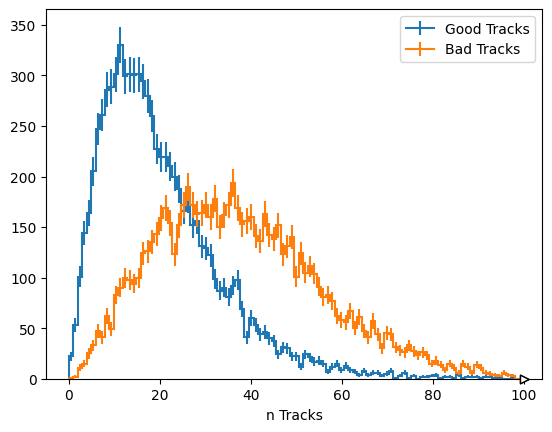

In [5]:
mplhep.histplot(h_good_tracks, label="Good Tracks")
mplhep.histplot(h_bad_tracks, label="Bad Tracks")
plt.legend()
plt.show()

Some basic track distributions...

c:\Users\gordo\Code\calratio\sx_training_fetch\.venv\Lib\site-packages\mplhep\utils.py:572: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


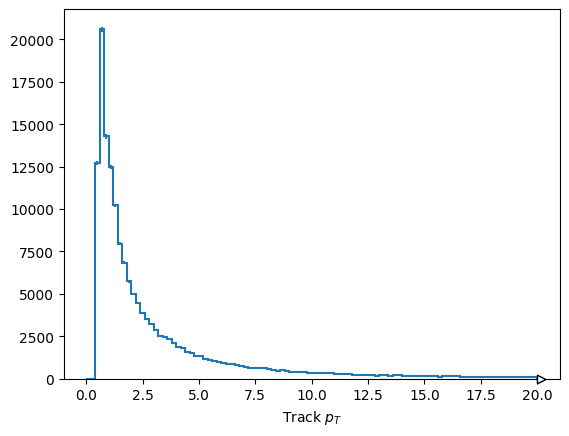

c:\Users\gordo\Code\calratio\sx_training_fetch\.venv\Lib\site-packages\mplhep\utils.py:572: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


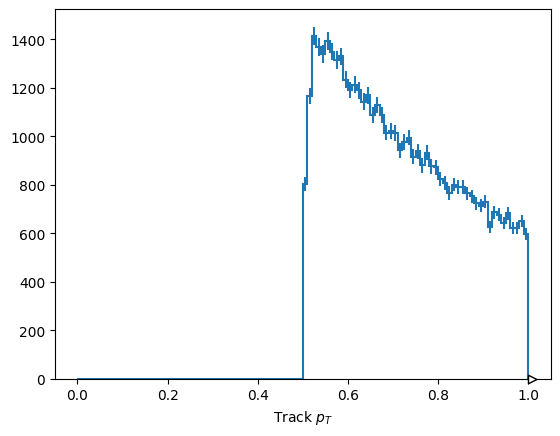

c:\Users\gordo\Code\calratio\sx_training_fetch\.venv\Lib\site-packages\mplhep\utils.py:572: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


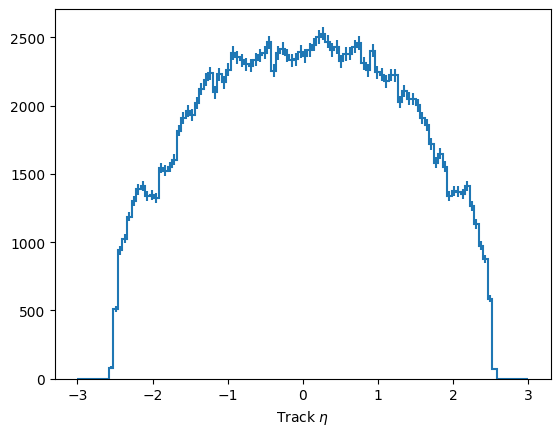

In [8]:
t_pt = Hist(hist.axis.Regular(100, 0.0, 20.0), label="Track pT", name="track pT").fill(
    ak.flatten(full_data.track_pT)
)
t_pt_close = Hist(hist.axis.Regular(100, 0.0, 1.0), label="Track pT", name="track pT").fill(
    ak.flatten(full_data.track_pT)
)
t_eta = Hist(
    hist.axis.Regular(100, -3.0, 3.0), label="Track eta", name="track eta"
).fill(ak.flatten(full_data.track_eta))
mplhep.histplot(t_pt)
plt.xlabel('Track $p_T$')
plt.show()
mplhep.histplot(t_pt_close)
plt.xlabel("Track $p_T$")
plt.show()
mplhep.histplot(t_eta)
plt.xlabel(r'Track $\eta$')
plt.show()